<a href="https://colab.research.google.com/github/annashiheart/FashionMNIST/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist 
(train_X, train_y),(test_X,test_y) = fashion_mnist.load_data()

test_X.shape

(10000, 28, 28)

In [3]:
# data preprocessing, scaling values from 0-255 to 0-1
train_X = train_X/255.0
test_X = test_X/255.0

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

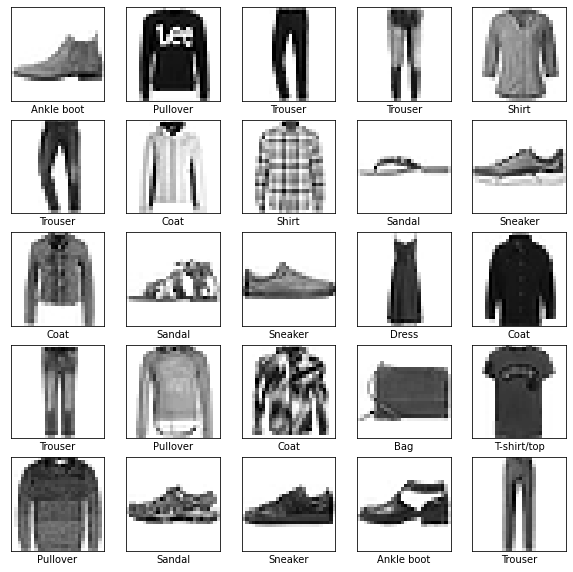

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    #image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_y[i]])
    i += 1
plt.show()

In [6]:
# build the layers of the cnn
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2), strides = 2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D((2,2), strides = 2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# set up model optimizer, loss function, and accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
train_X = tf.reshape(train_X, [60000, 28, 28, 1])
test_X = tf.reshape(test_X, [10000, 28, 28, 1])

In [8]:
# train the model on training data
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5606 - accuracy: 0.7974
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2149 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1828 - accuracy: 0.9333
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1592 - accuracy: 0.9408
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1333 - accuracy: 0.9499
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9601
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9729
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.063

In [9]:
# test the model on testing data
loss, acc = model.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.9198

Test accuracy:  0.9197999835014343


In [10]:
# show an object photo and label
def show_photo(i):
  plt.figure(figsize=(6,6))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_X[i], cmap=plt.cm.binary) # makes the colour grey
  plt.xlabel(class_names[test_y[i]])
  plt.show()

# assign each numerical label to its English equivalent
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# compare the model prediction and the actual classification
def classify(a):  
  print('')
  print('Model predicts this is a : '+ class_names[numero])
  print("\nHere's what it actually is: ")

def result(a):
  if numero == test_y[x]:
    print('Looks like the prediction was right. :)')
  else:
    print('Looks like the prediction was wrong. :(')

Please enter an integer between 1 and 10 000 (inclusive):
3

Model predicts this is a : Trouser

Here's what it actually is: 


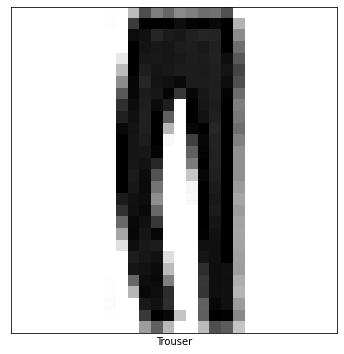

Looks like the prediction was right. :)


In [11]:
# anyone can test out the accuracy of the model
print('Please enter an integer between 1 and 10 000 (inclusive):')

while True:
  try:
    x = int(input())-1
  except ValueError:
    print("That is not an integer.")
    continue
  if x>=0 and x<10000:
    predictions = model.predict(test_X)
    numero = np.argmax(predictions[x])

    test_X = tf.reshape(test_X, [10000, 28, 28, 1])
    classify(x)
    test_X = tf.reshape(test_X, [10000, 28, 28])
    show_photo(x)
    result(x)

    break
  else:
    print('You did not enter an integer between 1 and 10 000. Please try again.')
    continue

